In [1]:
# напишіть функцію гіпотези лінійної регресії у векторному вигляді;
#y = w_0 + X * w_1
# де w_0 та w_1 вектора вагів, а Х - вектор вхідних змінних

In [54]:
# створіть функцію для обчислення функції втрат у векторному вигляді;
import numpy as np

def h(w_0, w_1, x):
    return w_0 + w_1 * x

def loss_function(w_0, w_1, df):
    n = df.area.shape[0]
    cost = 0
    for x, y in zip(df.area, df.price):
        cost += (h(w_0, w_1, x) -y) ** 2
    return cost / 2*n

In [55]:
# реалізуйте один крок градієнтного спуску;
def grad_step(w_0, w_1, dw_0, dw_1, lr=0.001):       
    # уточнення вагів, де lr швидкість - навчання (крок градиентного спуску) dw_0, dw_1 градіенти
    w_0 = w_0 - lr * dw_0
    w_1 = w_1 - lr * dw_1
    return w_0, w_1

In [56]:
# градіент
def grad_w(w_0, w_1, df):
    n = df.area.shape[0]
    grad_0 = grad_1 = 0
    for x, y in zip(df.area, df.price):
        grad_0 += h(w_0, w_1, x) - y
        grad_1 += (h(w_0, w_1, x) - y) *x
    return grad_0 / n, grad_1 / n

In [57]:
# градиентний спуск
def grad_descent(w_0, w_1, df, num_iter, lr=0.001, eps=0.0001):
    loss = loss_function(w_0, w_1, df)
    loss_history = [loss]
    
    for i in range(num_iter):
        dw_0, dw_1 = grad_w(w_0, w_1, df)
        w_0, w_1 = grad_step(w_0, w_1, dw_0, dw_1, lr=lr)
        loss = loss_function(w_0, w_1, df)
        if abs(loss - loss_history[-1]) < eps:
            loss_history.append(loss)
            break
        loss_history.append(loss)
    return w_0, w_1, loss_history

In [6]:
# функція нормалізації данних, для приведення до співставної розмірності
def normalize(data):
    data_mean = np.mean(data)
    value_range = np.max(data) - np.min(data)
    result = [(x - data_mean) / value_range for x in data]
    return result

In [63]:
# знайдіть найкращі параметри w для датасету прогнозуючу ціну на будинок залежно від площі, кількості ванних кімнат та кількості спалень;
import pandas as pd

url = r'C:\PythonProject\Python_Data_Science\Housing.csv'
df = pd.read_csv(url)

# нормалізуємо дані в датасеті
norm_df = pd.DataFrame()

norm_df['price'] = normalize(df.price)
norm_df['area'] = normalize(df.area)
norm_df['bedrooms'] = normalize(df.bedrooms)
norm_df['bathrooms'] = normalize(df.bathrooms)
norm_df.head()

,price,area,bedrooms,bathrooms
0,0.738811,0.155977,0.206972,0.237920
1,0.647902,0.261818,0.206972,0.904587
2,0.647902,0.330547,0.006972,0.237920
3,0.644872,0.161475,0.206972,0.237920
4,0.575175,0.155977,0.206972,-0.095413


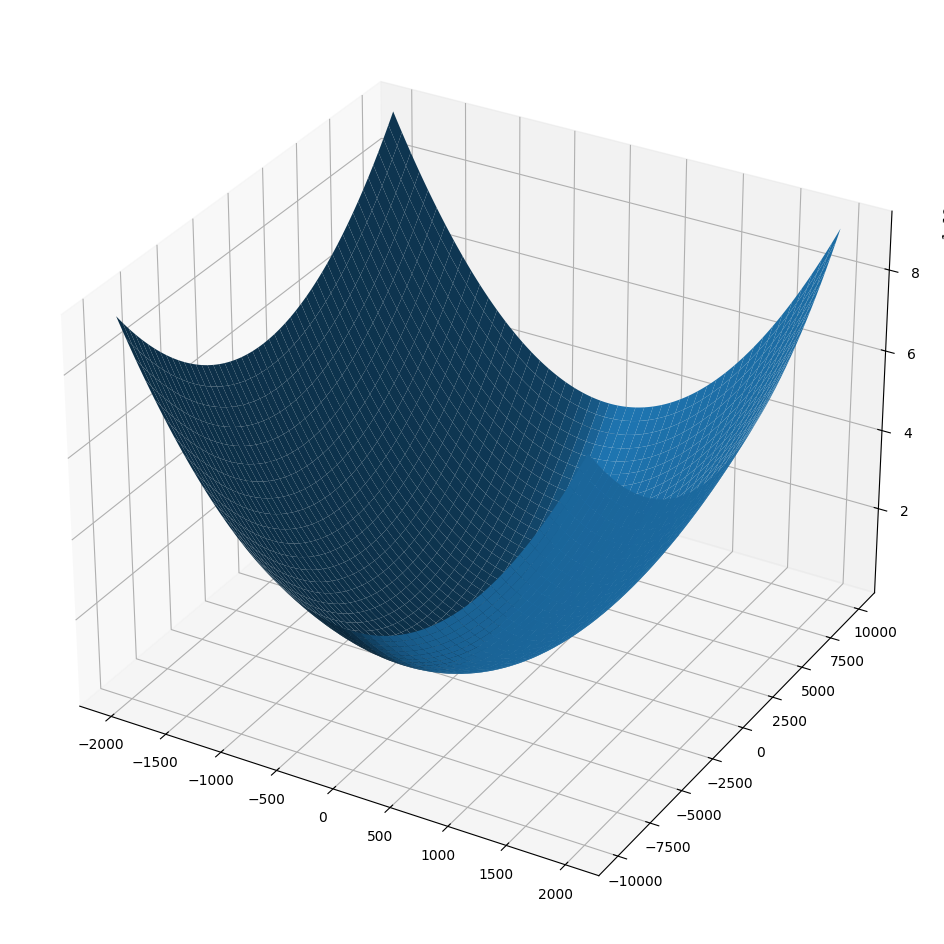

In [32]:
#побудуємо графік функції втрат щоб побачити чи він схожий візуально на параболічну форму нашої квадратичної функції втрат
import matplotlib.pyplot as plt

grid_w0 = np.arange(-2000, 2000, 10)
grid_w1 = np.arange(-10000, 10000, 20)
gw_0, gw_1 = np.meshgrid(grid_w0, grid_w1)

z = loss_function(gw_0, gw_1, norm_df)
fig = plt.figure(figsize = (14, 12))
ax = fig.add_subplot(projection = '3d')
ax.plot_surface(gw_0, gw_1, z)
plt.show()

In [58]:
w_0, w_1, history = grad_descent(0., 0., norm_df, 1000, lr=0.1)
w_0, w_1, len(history)

(3.442709929571591e-17, 0.5189491876061754, 1001)

<Axes: xlabel='area', ylabel='price'>

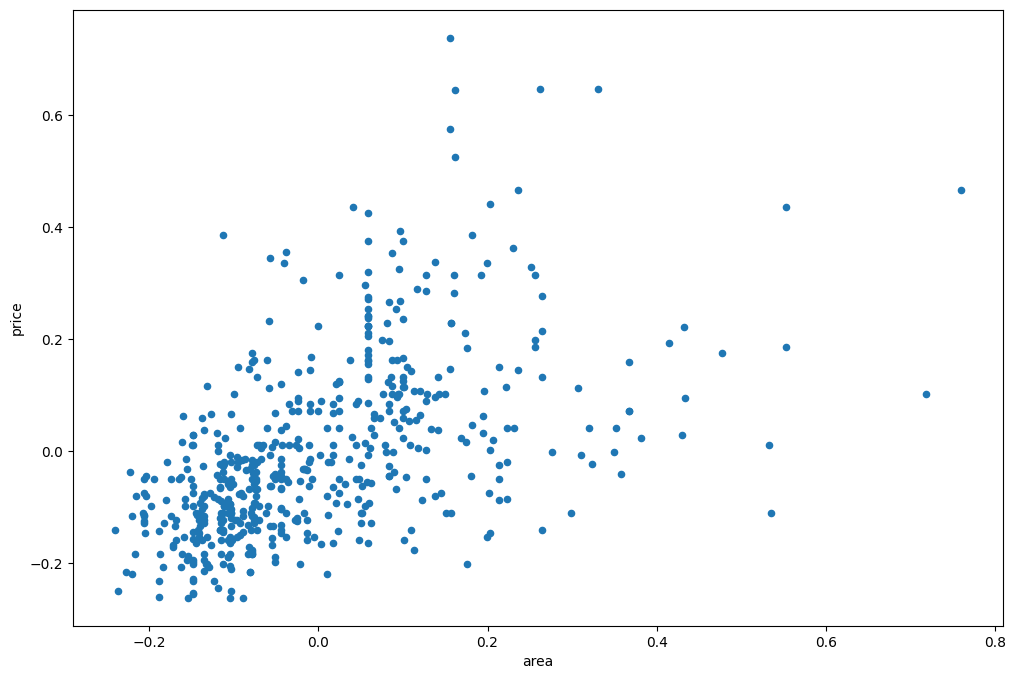

In [40]:
norm_df.plot(x='area', y='price', kind='scatter', figsize=(12, 8))

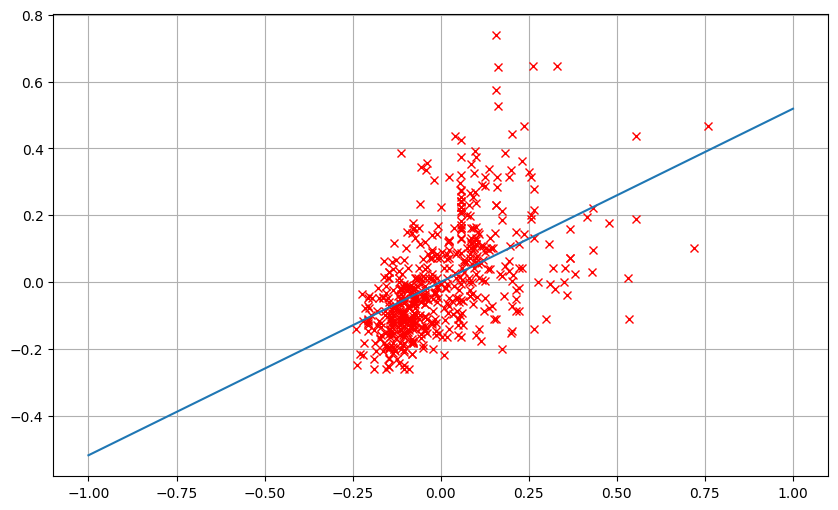

In [59]:
# візуалізуємо графік по винайденним вагам
plt.figure(figsize = (10, 6))
plt.plot(norm_df.area, norm_df.price, 'rx')
x = np.linspace(-1, 1, 500)
plt.plot(x, h(w_0, w_1, x))
plt.grid()

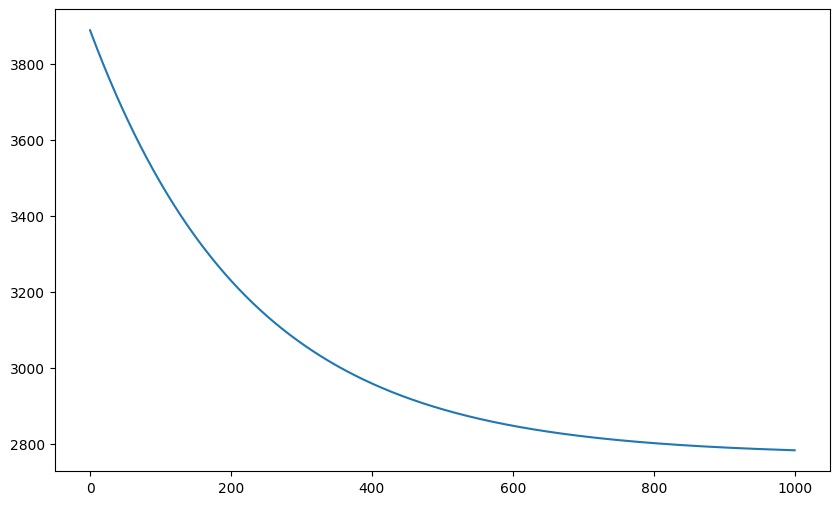

In [61]:
# побудуємо криву навчання щоб зрозуміти шо сі стало, наскільки минаблизились до мінімума
plt.figure(figsize = (10, 6))
plt.plot(history)

In [68]:
# для порівнняя використаємо бібліотеку sickit-learn і знайдемо параметри w для датасету також залежно від площі
# а також від кількості ванних кімнат та кількості спалень як вказано в дз. заодно не будумо вносити зміни в існуючий код функцій або ускладнювати все вводячи проміжні обьекти обгортки
from sklearn import linear_model

model = linear_model.LinearRegression()
X_area = np.array([norm_df.area]).T
X_bedrooms = np.array([norm_df.bedrooms]).T
X_bathrooms = np.array([norm_df.bathrooms]).T
X_area.shape, X_bedrooms.shape, X_bathrooms.shape

((545, 1), (545, 1), (545, 1))

In [71]:
Y = np.array(norm_df.price)
Y.shape

(545,)

In [114]:
model.fit(X_area, Y)
scl_w_0 = model.intercept_
scl_w_1 = model.coef_
print(f'залежність ціни від площи: w0={model.intercept_}, w1={model.coef_}')
model.fit(X_bedrooms, Y)
scl_bed_w_0 = model.intercept_
scl_bed_w_1 = model.coef_
print(f'залежність ціни від кількості спален: w0={model.intercept_}, w1={model.coef_}')
model.fit(X_bathrooms, Y)
scl_bath_w_0 = model.intercept_
scl_bath_w_1 = model.coef_
print(f'залежність ціни від кількості ванних: w0={model.intercept_}, w1={model.coef_}')

залежність ціни від площи: w0=6.353102831524843e-17, w1=[0.58196837]
залежність ціни від кількості спален: w0=6.656547057932253e-17, w1=[0.40207278]
залежність ціни від кількості ванних: w0=5.5411935388514236e-17, w1=[0.50040491]


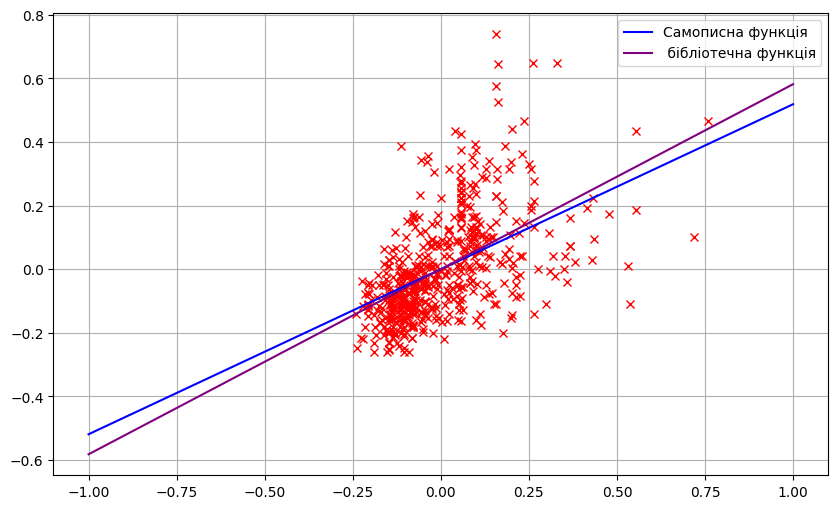

In [81]:
# візуаліземо залежність ціни від площи знайдені двома способами
plt.figure(figsize = (10, 6))
plt.plot(norm_df.area, norm_df.price, 'rx')
x = np.linspace(-1, 1, 500)
plt.plot(x, h(w_0, w_1, x), color='blue', label="Самописна функція")
plt.plot(x, h(scl_w_0, scl_w_1, x), color='purple', label=" Бібліотечна функція")
plt.legend()
plt.grid()
# для покращення прогнозу можемо провести донавчання моделі передавши  в якості початкових параметрів вагів ті що ми здобули попередньо
# або збільшити  кількість іткраций град спуску, або подальшому підбирати коєфіціенти eps та швидкість навчання для 
#знаходження більш точного мінімуму нашої функціі втрат

In [110]:
# знайдіть ці ж параметри за допомогою аналітичного рішення;
X = np.array([[1]*len(np.array(norm_df.area)), np.array(norm_df.area), np.array(norm_df.bedrooms), np.array(norm_df.bathrooms)], dtype=float)
X = X.T
X_inv = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), Y)
X_inv

array([3.24718551e-17, 4.77142690e-01, 1.76112569e-01, 3.60012857e-01])

In [134]:
# порівняйте отримані результати.
print(f'коєфіціент w0 знайдений за допомогою бібліотечної функції\nвід площи={scl_w_0}\nвід кількості спален={scl_bed_w_0}\nвід кількості ванн={scl_bath_w_0}\nзнайдений аналітично={X_inv[0]}')
print('-' * 50)
print(f'коєфіціент w1 знайдений за допомогою бібліотечної функції\nвід площи={scl_w_1[0]}\nзнайдений аналітично={X_inv[1]}')
print('-' * 50)
print(f'коєфіціент w1 знайдений за допомогою бібліотечної функції\nвід кількості спален={scl_bed_w_1[0]}\nзнайдений аналітично={X_inv[2]}')
print('-' * 50)
print(f'коєфіціент w1 знайдений за допомогою бібліотечної функції\nвід кількості ванн={scl_bath_w_1[0]}\nзнайдений аналітично={X_inv[3]}')

коєфіціент w0 знайдений за допомогою бібліотечної функції
від площи=6.353102831524843e-17
від кількості спален=6.656547057932253e-17
від кількості ванн=5.5411935388514236e-17
знайдений аналітично=3.247185506594086e-17
--------------------------------------------------
коєфіціент w1 знайдений за допомогою бібліотечної функції
від площи=0.5819683733046753
знайдений аналітично=0.4771426895812343
--------------------------------------------------
коєфіціент w1 знайдений за допомогою бібліотечної функції
від кількості спален=0.4020727787584586
знайдений аналітично=0.17611256873124848
--------------------------------------------------
коєфіціент w1 знайдений за допомогою бібліотечної функції
від кількості ванн=0.5004049065210587
знайдений аналітично=0.3600128565690897


In [129]:
# напишемо гипотезу залежності ціни зразу від трьох наших умов
def h1(w_a_0, w_a_1, w_a_2, w_a_3, x):
    return w_a_0 + w_a_1 * x + w_a_2 * x + w_a_3 * x
            

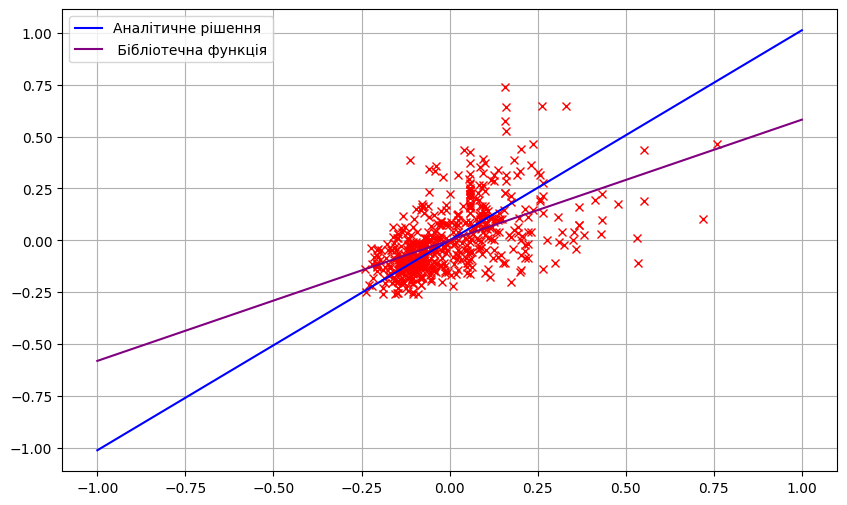

In [130]:
# візуаліземо залежність ціни від площи знайдені за допомогою біліотеки sklearn і порівняємо з візуалізацією аналітичного рішення
plt.figure(figsize = (10, 6))
plt.plot(norm_df.area, norm_df.price, 'rx')
x = np.linspace(-1, 1, 500)
plt.plot(x, h1(X_inv[0], X_inv[1], X_inv[2], X_inv[3], x), color='blue', label="Аналітичне рішення")
plt.plot(x, h(scl_w_0, scl_w_1, x), color='purple', label=" Бібліотечна функція")
plt.legend()
plt.grid()